In [1]:
using Plots
gr()
theme(:dark)

In [2]:
changes = Array{BigInt}(undef, 0, 2)

open("data\\day_02.txt", "r") do file   
    for line in eachline(file)
        direction, value = split(line, " ");
        value = parse(Int, value); 
        h = 0
        v = 0
        
        if direction in ["up" "down"]
            if direction == "down"
                v = -value
            else
                v = value
            end
        else
            h = value
        end
        
        global changes = [changes ; [h v]]
    end
end
size(changes)

(1000, 2)

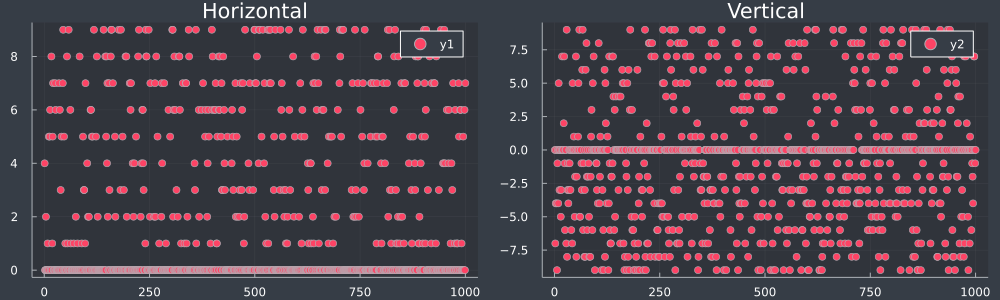

In [3]:
plot([changes[:, 1], changes[:, 2]], t=:scatter, title=["Horizontal" "Vertical"],
     layout=2, size=(1000, 300))

# Puzzle 1

In [4]:
positions = [0 0 ; cumsum(changes, dims=1)];
size(positions)

(1001, 2)

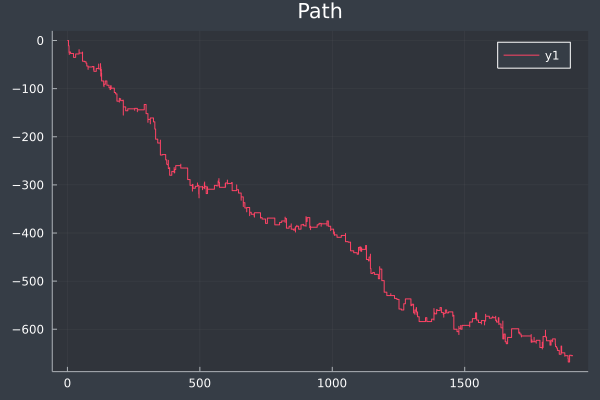

In [5]:
plot(positions[:, 1], positions[:, 2], title="Path")

In [6]:
last_horz, last_vert = positions[end, :];
last_horz * last_vert

-1250395

# Puzzle 2

In [7]:
positions = [0 0;];
aim = 0;

for row in eachrow(changes)
    hc, vc = row
    h, v = positions[end, :]
    
    aim += vc
    
    h += hc
    v += aim * hc
    
    positions = [positions ; [h v]]
end

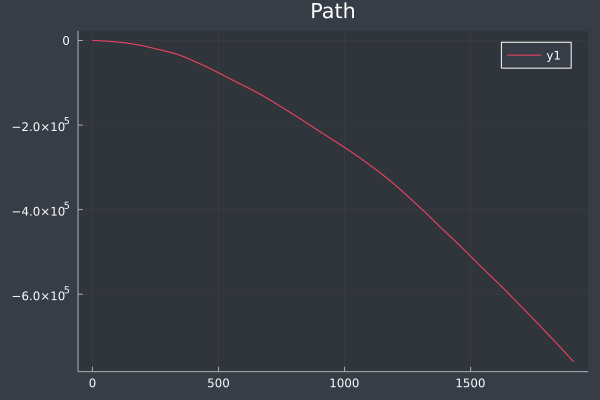

In [8]:
plot(positions[:, 1], positions[:, 2], title="Path")

In [9]:
last_horz, last_vert = positions[end, :];
last_horz * last_vert

-1451210346